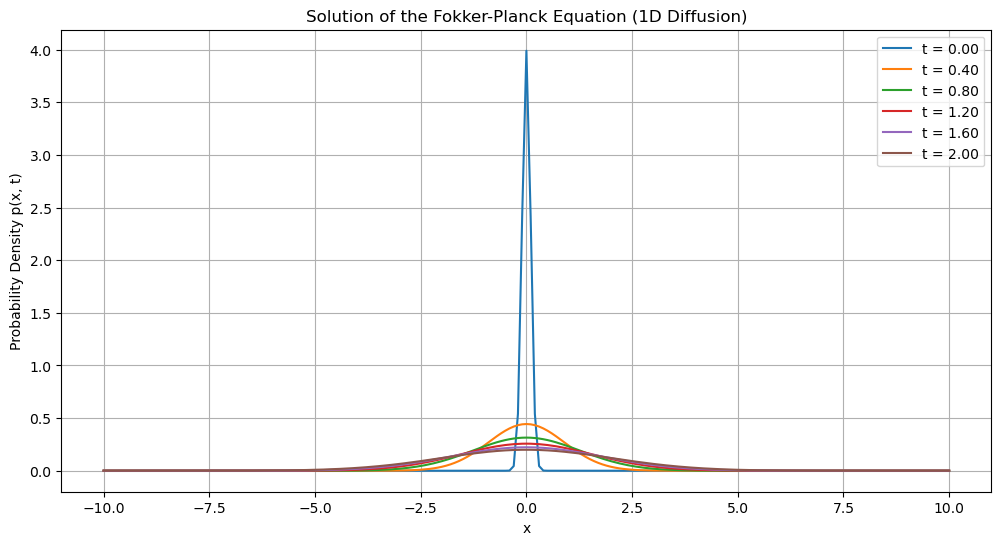

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fokker_planck_1d(D, x_range, t_range, dx, dt):
    """
    1차원 포커-플랑크 방정식을 수치적으로 풉니다.

    Parameters:
    - D: 확산 계수 (상수)
    - x_range: x의 범위 (튜플, 예: (-10, 10))
    - t_range: 시간 t의 범위 (튜플, 예: (0, 1))
    - dx: x 방향 격자 간격
    - dt: 시간 스텝 크기

    Returns:
    - x: x 격자점의 배열
    - t: 시간 격자점의 배열
    - p: 확률 밀도 함수의 값 (시간과 공간에 대한 2D 배열)
    """
    # 격자 생성
    x = np.arange(x_range[0], x_range[1] + dx, dx)
    t = np.arange(t_range[0], t_range[1] + dt, dt)
    nx = len(x)
    nt = len(t)

    # 초기 조건: 중앙에 좁은 가우시안 분포
    sigma0 = 0.1
    p = np.zeros((nt, nx))
    p[0, :] = (1 / (np.sqrt(2 * np.pi) * sigma0)) * np.exp(-x**2 / (2 * sigma0**2))

    # Neumann 경계 조건 (반사 경계 조건)
    for n in range(0, nt - 1):
        # 내부 격자점에 대해 업데이트
        for i in range(1, nx - 1):
            p[n+1, i] = p[n, i] + D * dt / dx**2 * (p[n, i+1] - 2 * p[n, i] + p[n, i-1])
        # 경계 조건 적용 (미분 값이 0이 되도록)
        p[n+1, 0] = p[n+1, 1]
        p[n+1, -1] = p[n+1, -2]

    return x, t, p

def main():
    # 파라미터 설정
    D = 1.0             # 확산 계수
    x_range = (-10, 10) # x의 범위
    t_range = (0, 2)    # 시간의 범위
    dx = 0.1            # x 격자 간격
    dt = 0.001          # 시간 스텝 크기

    # 안정성 조건 확인 (Explicit 방법의 경우)
    stability_condition = D * dt / dx**2
    if stability_condition > 0.5:
        print("Warning: Stability condition not met. Decrease dt or increase dx.")
        return

    # 포커-플랑크 방정식 풀이
    x, t, p = fokker_planck_1d(D, x_range, t_range, dx, dt)

    # 시간에 따른 확률 밀도 함수 시각화
    plt.figure(figsize=(12, 6))
    for n in range(0, len(t), len(t)//5):
        plt.plot(x, p[n, :], label=f"t = {t[n]:.2f}")
    plt.title("Solution of the Fokker-Planck Equation (1D Diffusion)")
    plt.xlabel("x")
    plt.ylabel("Probability Density p(x, t)")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

for n in [10**2, 10**3, 10**4, 10**5, 10**6]:
    # 데이터 생성
    np.random.seed(42)
    N = n
    dt = 1/252
    true_mu = 5
    true_sigma = 0.02
    dW = np.random.normal(0, np.sqrt(dt), N)
    returns = true_mu * dt + true_sigma * dW
    S0 = 100
    prices = S0 * np.exp(np.cumsum(returns))
    data = pd.DataFrame({
        'Price': prices,
        'Return': returns
    })

    # 음의 로그 우도 함수 정의
    def negative_log_likelihood(params, data, dt):
        mu, sigma = params
        returns = data['Return'].values
        N = len(returns)
        nll = 0.5 * N * np.log(2 * np.pi * sigma**2 * dt) + \
            np.sum((returns - mu * dt)**2) / (2 * sigma**2 * dt)
        return nll

    # 초기값 및 제약 조건 설정
    initial_params = [0.0, 0.01]
    bounds = [(-np.inf, np.inf), (1e-6, np.inf)]

    # 최적화 실행
    result = minimize(
        negative_log_likelihood, 
        initial_params, 
        args=(data, dt), 
        bounds=bounds, 
        method='L-BFGS-B'
    )
    estimated_mu, estimated_sigma = result.x

    # 결과 출력
    print("True mu:", true_mu)
    print("Estimated mu:", estimated_mu)
    print("True sigma:", true_sigma)
    print("Estimated sigma:", estimated_sigma)

    # Visualization of results
    plt.figure(figsize=(10, 6))
    plt.hist(data['Return'], bins=50, density=True, alpha=0.6, color='g', label='Actual Returns')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, estimated_mu * dt, estimated_sigma * np.sqrt(dt))
    plt.plot(x, p, 'k', linewidth=2, label='Estimated Distribution')
    plt.title('Return Distribution and Estimated Normal Distribution: N = {}'.format(N))
    plt.xlabel('Returns')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(f'estimated_return_distribution_{N}.png')
    plt.close()


True mu: 5
Estimated mu: 4.967029816127056
True sigma: 0.02
Estimated sigma: 0.018072318384741486
True mu: 5
Estimated mu: 5.006101549025248
True sigma: 0.02
Estimated sigma: 0.01957479780020811
True mu: 5
Estimated mu: 4.999321932663464
True sigma: 0.02
Estimated sigma: 0.02006821106240746


/var/folders/4x/krzx13nx7xq26hm5m_1wrp3h0000gn/T/ipykernel_10801/2779465882.py:17: RuntimeWarning: overflow encountered in exp
  prices = S0 * np.exp(np.cumsum(returns))
/var/folders/4x/krzx13nx7xq26hm5m_1wrp3h0000gn/T/ipykernel_10801/2779465882.py:17: RuntimeWarning: overflow encountered in multiply
  prices = S0 * np.exp(np.cumsum(returns))


True mu: 5
Estimated mu: 5.0003069606871255
True sigma: 0.02
Estimated sigma: 0.020018013974500412
True mu: 5
Estimated mu: 4.999492165370023
True sigma: 0.02
Estimated sigma: 0.02000372668395163
